**Exercise 2.3**: In my implementation of reachable_nodes, you might be bothered by the apparent inefficiency of adding all neighbors to the stack without checking whether they are already in seen. Write a version of this function that checks the neighbors before adding them to the stack. Does this "optimization" change the order of growth? Does it make the function faster?

Here is the original implementation of `reachable_nodes`:

In [1]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns
import timeit

# random seed
np.random.seed(11)

# set node colors
colors = sns.color_palette('pastel', 8)
sns.set_palette(colors)

C:\Users\Carlo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The line that adds all the neighbors to the stack is `stack.extend(G.neighbors(node))`. We need to check first if the neighbors of `node` is already in `seen`.

In [3]:
def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend([n for n in G.neighbors(node) if n not in seen])
    return seen

In the optimized function, we used a list comprehension and conditional to check if the neighbors of `node` in `G` is not in `seen`. If yes, we add it to the stack.

We can now generate a complete graph to check our new function. We will use a `all_pairs` function to generate all edges.

In [4]:
# Generate all pairs given the nodes
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u,v

# Generates a directed graph given n nodes and edges with probability p
def make_complete_graph(n):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

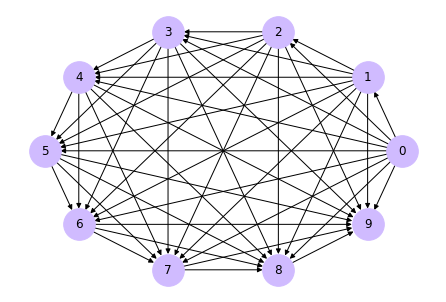

In [18]:
complete = make_complete_graph(10)
nx.draw_circular(complete,
                node_color = 'C4',
                node_size = 1000,
                with_labels = True)

In [19]:
len(reachable_nodes(complete, 0))

10

In [20]:
len(reachable_nodes_precheck(complete, 0))

10

Now that both `reachable_nodes` and `reachable_nodes_precheck` is functioning, we should test how much faster is the optimized version compared to the original.

In [21]:
%timeit len(reachable_nodes(complete,0))

16 µs ± 694 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [22]:
%timeit len(reachable_nodes_precheck(complete, 0))

14.3 µs ± 803 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Based from these measurements, `reachable_nodes_precheck`actually runs faster than `reachable_nodes`. In `reachable_nodes_precheck`, we used a for loop to iterate through all the neighbors of `node` which is linear in the number of neighbors. Next, we checked if each neighbor is already in `seen`, which is a constant time operation. If that neighbor is not in seen, then we add it which is constant time also. Thus both functions are linear in the number of neighbors and have the same order of growth.

We check how many times each node is added to `seen` and `stack`. Each node is only added to `seen` once for both functions. In `stack`, `reachable_nodes` adds the `k` neighbors of each node to `stack` multiple times. Thus, since `reachable_nodes_precheck` does not continually add and remove the nodes from the stack, this might be the reason that it runs faster than `reachable_nodes` without changing the order of growth.

For a higher number of nodes, gap in run time between `reachable_nodes_precheck` and `reachable_nodes` also becomes larger:

In [23]:
complete2 = make_complete_graph(100)

In [24]:
%timeit len(reachable_nodes(complete2,0))

988 µs ± 161 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
%timeit len(reachable_nodes_precheck(complete2, 0))

315 µs ± 23.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


With `nodes` = 100, the `reachable_nodes_precheck` actually runs more than $3\times$ as fast than `reachable_nodes`, thus the optimization results in a more significant improvement in run time as the network becomes larger.